In [66]:
#Importing all the required modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import savetxt
import pandas as pd
import datetime 
import calendar
import random
from datetime import datetime

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#matplotlib and Seaborn
from matplotlib import pyplot as plt
import seaborn as sns

In [33]:
#Loading data
df = pd.read_csv('DS_MiniProject_ANON.csv')
print(df.shape)
df.head()

(130086, 29)


,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#Converting "DATE_FOR" to weekday names
df['Day_of_Week'] = pd.to_datetime(df['DATE_FOR']).dt.weekday_name

In [35]:
#Handling missing values using imputing (mode)
#Missing values
print(df.isnull().sum())

#Imputing
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

#Recheck the imputed data
print(df.isnull().sum())

DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
Day_of_Week                0
dtype: int64
DATE_FOR                 0
RTD_ST_CD                0
CustomerSegment          0
Tenure                   0
Age      

In [36]:
#Column names
print(df.columns)

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag', 'Day_of_Week'],
      dtype='object')


In [37]:
#Categorical features
#A list of categorical features
cat_cols = ['DATE_FOR','RTD_ST_CD','CustomerSegment','MART_STATUS','GENDER','RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M', 'EVENT1_30_FLAG',
 'POLICYPURCHASECHANNEL','Day_of_Week']

#Missing values in categorical features
df[cat_cols].isnull().sum()
print(df[cat_cols].apply(lambda x: x.value_counts()).T.stack())

DATE_FOR               5/13/2014     15254.0
                       5/14/2014     16884.0
                       5/15/2014     16624.0
                       5/16/2014     16570.0
                       5/17/2014     16053.0
                       5/18/2014     17002.0
                       5/19/2014     16704.0
                       5/20/2014     14995.0
RTD_ST_CD              ST_S0          8512.0
                       ST_S1          1151.0
                       ST_S10         1164.0
                       ST_S11         4258.0
                       ST_S12         2270.0
                       ST_S13          934.0
                       ST_S14         7690.0
                       ST_S15          615.0
                       ST_S16         3034.0
                       ST_S17          949.0
                       ST_S18          544.0
                       ST_S19          724.0
                       ST_S2          1920.0
                       ST_S20         2427.0
          

In [38]:
# Dropping 'EVENT1_30_FLAG' since it has only one class (not useful feature for classification)
df = df.drop(['EVENT1_30_FLAG'], axis=1)

#Removing the same feature from lst of categorical features
cat_cols.remove('EVENT1_30_FLAG')

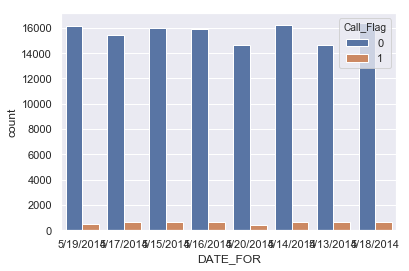

In [77]:
sns.set(style="darkgrid")
ax = sns.countplot(x="DATE_FOR",  hue="Call_Flag",data=df)

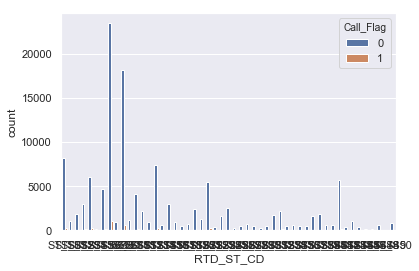

In [69]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RTD_ST_CD",  hue="Call_Flag",data=df)

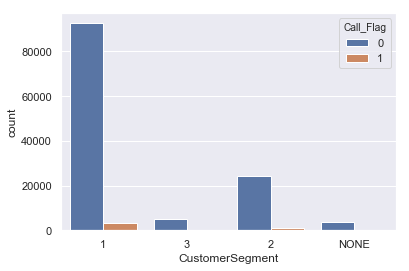

In [70]:
sns.set(style="darkgrid")
ax = sns.countplot(x="CustomerSegment",  hue="Call_Flag",data=df)

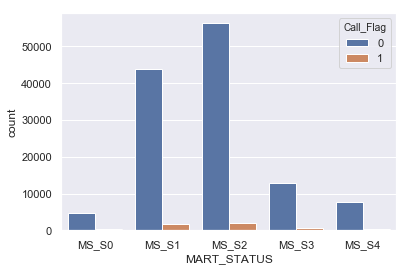

In [71]:
sns.set(style="darkgrid")
ax = sns.countplot(x="MART_STATUS",  hue="Call_Flag",data=df)

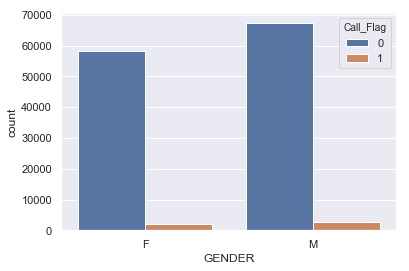

In [72]:
sns.set(style="darkgrid")
ax = sns.countplot(x="GENDER",  hue="Call_Flag",data=df)

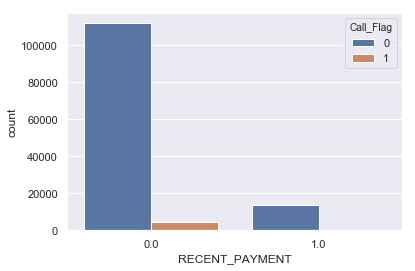

In [73]:
sns.set(style="darkgrid")
ax = sns.countplot(x="RECENT_PAYMENT",  hue="Call_Flag",data=df)

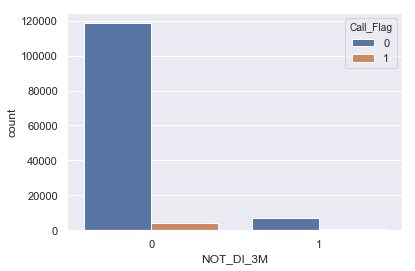

In [74]:
sns.set(style="darkgrid")
ax = sns.countplot(x="NOT_DI_3M",  hue="Call_Flag",data=df)

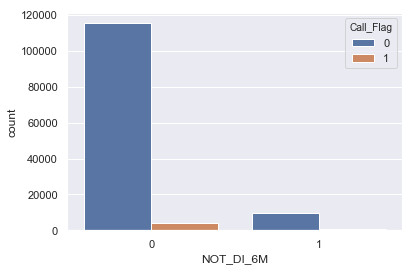

In [75]:
sns.set(style="darkgrid")
ax = sns.countplot(x="NOT_DI_6M",  hue="Call_Flag",data=df)

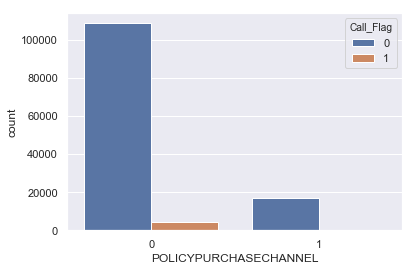

In [76]:
sns.set(style="darkgrid")
ax = sns.countplot(x="POLICYPURCHASECHANNEL",  hue="Call_Flag",data=df)

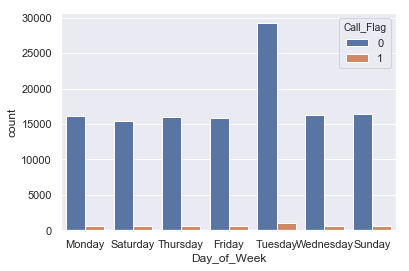

In [79]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Day_of_Week",  hue="Call_Flag",data=df)

In [39]:
#Getting dummis for categorical features
df_final = pd.get_dummies(df, columns=cat_cols)

In [40]:
#Recheck the shape and columns of the final dataset
print(df_final.columns)
print(df_final.shape)

Index(['Tenure', 'Age', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'PAYMENTS_6M',
       'CHANNEL1_3M',
       ...
       'NOT_DI_6M_1', 'POLICYPURCHASECHANNEL_0', 'POLICYPURCHASECHANNEL_1',
       'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday'],
      dtype='object', length=104)
(130086, 104)


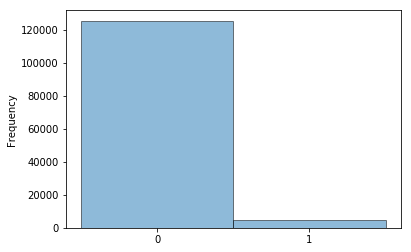

In [41]:
# Display target class counts - column='Call_Flag'
df_final.Call_Flag.plot(kind='hist',bins=[-.5,.5,1.5], ec="k", alpha=0.5)
plt.xticks((0,1))
plt.show()

In [42]:
#Splitting final data into train and test datasets
random.seed(42)
train, test = train_test_split(df_final, test_size=0.20, stratify=df_final['Call_Flag']) 

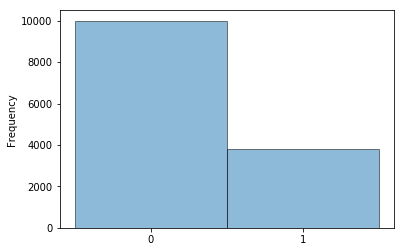

In [44]:
#DOWNsampling majority class (0) to handle imbalanced data
train_majority = train[train["Call_Flag"] == 0]
train_minority = train[train["Call_Flag"] == 1]
train_majority_downsampled = resample(train_majority, 
                                 replace=False,     
                                 n_samples=10000,    
                                 random_state=42) 
df_train = pd.concat([train_minority, train_majority_downsampled])

 
# Redisplay target class counts - column='Call_Flag' after downsampling
df_train.Call_Flag.plot(kind='hist',bins=[-.5,.5,1.5], ec="k", alpha=0.5)
plt.xticks((0,1))
plt.show()

In [45]:
#Defining the features and target 
X = df_train.drop(['Call_Flag'], axis=1)
y = df_train['Call_Flag'].values

In [46]:
# Setting A hyperparameter grid search for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 8, 9, 10, 15],
        'learning_rate':[0.001,0.01,0.1,0.2,0.5,0.9],
        'n_estimators':[50,100,200,300,400,500,600,700,800,900,1000]
        }

A total number of combinations for the set of parameters above is a product of options for each parameter (3 x 5 x 3 x 3 x 7 x 6 x 11 = 62,370). It also needs to be multiplied by 5 to calculate a total number of data-fitting runs as we will be doing 5-fold cross-validation.

In [49]:
#Model 
xgb = XGBClassifier(objective='binary:logistic',silent=True, nthread=8)

In [51]:
#Stratified folds and grid search parameters
folds = 5
param_comb = 10

#StratifiedKFold
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

#Random_search
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=8, cv=skf.split(X, y), verbose=3, random_state=42 )

#Model fit
random_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001A6E7B698B8>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=8, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=8,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5, 6, 8, 9, 10, 15], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9], 'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,


In [52]:
#Random search results
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results.csv', index=False)


 All results:
{'mean_fit_time': array([ 77.77024541,   1.64167457,   8.98058147, 162.09011273,
         9.2125864 ,  25.97801228,   2.43945866,  19.68610988,
        16.75189686,   9.65371122]), 'std_fit_time': array([ 4.16046454,  0.23655204,  0.29478563, 11.05325002,  0.43640857,
        1.52451945,  0.09149287,  0.85491689,  0.6809965 ,  2.03644814]), 'mean_score_time': array([0.06225624, 0.03009086, 0.02704802, 0.11642828, 0.0285552 ,
       0.03159318, 0.02090826, 0.03322778, 0.02546015, 0.02249589]), 'std_score_time': array([0.00678539, 0.01438068, 0.00490266, 0.00936433, 0.00190795,
       0.00210623, 0.0009522 , 0.00258278, 0.00138013, 0.00224455]), 'param_subsample': masked_array(data=[0.6, 1.0, 0.8, 0.8, 0.6, 0.8, 1.0, 0.6, 1.0, 0.6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[700, 50, 200, 900, 100, 300, 100, 600, 100, 

In [53]:
#Preparing testing dataset 
X_test = test.drop(['Call_Flag'], axis=1)
y_test = test['Call_Flag'].values

In [54]:
#Prediction based on best parameters
y_predict = random_search.predict(X_test)
y_predict_probs = random_search.predict_proba(X_test)

In [55]:
#Classification report
target_names = ['0', '1']
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95     25065
          1       0.21      0.55      0.30       953

avg / total       0.95      0.91      0.93     26018



In [56]:
#ROC_AUC value
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_predict_probs[:, 1])
roc_value

0.8633563438103952

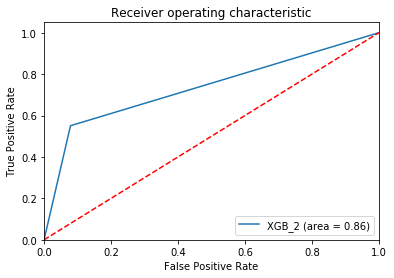

In [57]:
#ROC_AUC curve
RF_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.figure()
plt.plot(fpr, tpr, label='XGB_2 (area = %0.2f)' % roc_value)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('xgboost with Resampling_ROC')
plt.show()

In [58]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[23088,  1977],
       [  428,   525]], dtype=int64)

In [60]:
#Saving the predictions
Prediction_GrounfTruth = np.column_stack((y_predict, y_test))
from numpy import savetxt
savetxt('Predictions_Final_XGB_Downsamling.csv', Prediction_GrounfTruth, delimiter=',')